In [73]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Display all the columns of dataframe
pd.pandas.set_option('display.max_columns', None)

In [75]:
#load the dataset
df = pd.read_csv('downloads/heart_disease_dataset.csv')

In [77]:
#print shape of dataset with rows and columns
df.shape

(303, 14)

In [79]:
#show the first 5 rows of dataset
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal  num  
0   0     6    0  
1   3     3    1  
2   2     7    1  
3   0     3    0  
4   0     3    0

In [81]:
# To show all the features in dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [83]:
# to check the missing values
df.isnull().sum()>0

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [85]:
def heart_diseases(value):
    '''function to convert numerical feature to categorical feature'''
    if value == 0:
        return 'absence'
    else:
        return 'presnce'

In [87]:
# adding new column to dataset of converted data

df['heart_disease'] = df['num'].apply(heart_diseases)

In [89]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope      ca  thal  num heart_disease  
0        3       0     6    0       absence  
1        2       3     3    1       presnce  
2        2       2     7    1       presnce  
3        3       0     3    0       absence  
4        1       0     3    0       absence  
..     ...     ...   ...  ...           ...  
298      2       0     7    1       presnce  
299      2       2     7    1       presnce  
300      2       1     7    1       presnce  
301      2       1     3    1       presnce  
302      1 -100000     3    0       absence  

[303 rows x 15 columns]

In [91]:
# to count the number of people having heart diseases and NOT having heart diseases

hd = df.groupby('heart_disease')['num'].count()
hd

heart_disease
absence    164
presnce    139
Name: num, dtype: int64

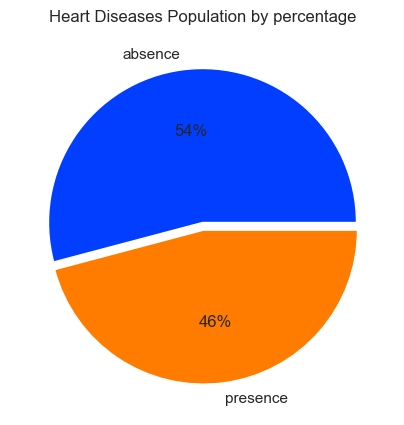

In [95]:
# to plot the bar chart of above using matplotlib and seaborn

plt.figure(figsize=(5,5))
clrs = sns.color_palette('bright')
explode = [0, 0.05]
plt.pie(hd, labels=['absence','presence'], autopct='%0.0f%%', colors=clrs, explode=explode)
plt.title('Heart Diseases Population by percentage')
plt.show()


C:\Users\DHARSHITHAA KS\AppData\Local\Temp\ipykernel_2076\1503600205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=df, palette='bright')


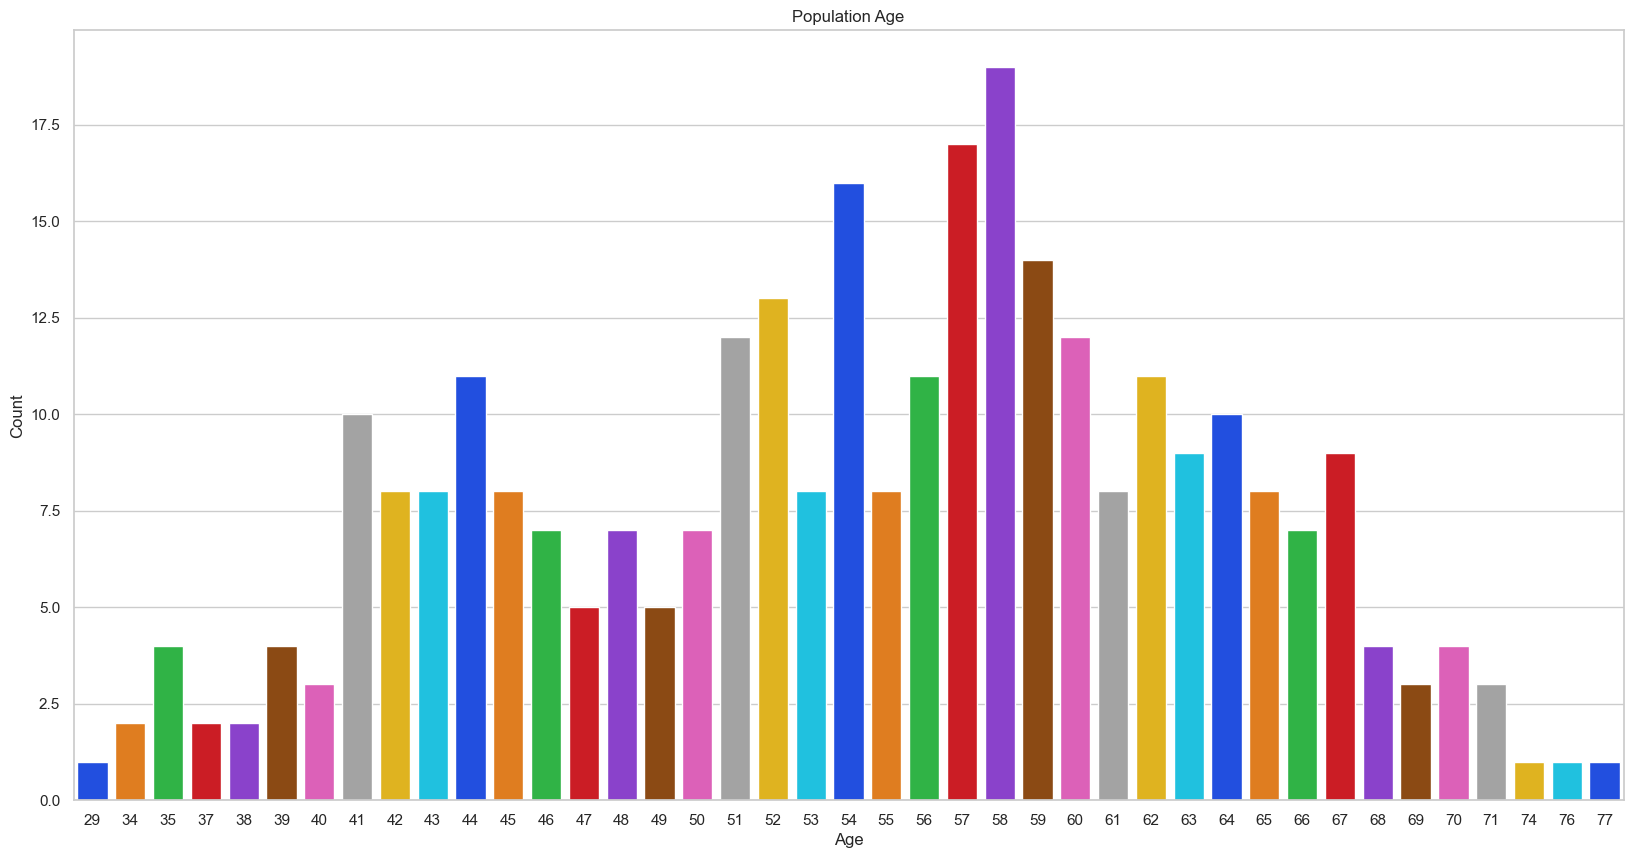

In [97]:
# plotting countplot of population age using matplotlib and seaborn

plt.figure(figsize=(20,10))
plt.title('Population Age')
sns.countplot(x='age', data=df, palette='bright')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [99]:
# To find the minimum, maximum and average of the population age using statistical analysis

min_age = df['age'].min()
max_age = df['age'].max()
mean_age = df['age'].mean()
print(f"The minimum age is {min_age}")
print(f"The maximum age is {max_age}")
print(f"The average age is {np.round(mean_age, 2)}")

The minimum age is 29
The maximum age is 77
The average age is 54.44


In [101]:
# To divide the population age in different categories

young_age = df[(df['age']>=29) & (df['age']<40)]
middle_age = df[(df['age']>=40) & (df['age']<55)]
old_age = df[(df['age']>55)]
print(f"Number of young age people = {len(young_age)}")
print(f'Number of middle age people = {len(middle_age)}')
print(f'Number of old age people = {len(old_age)}')

Number of young age people = 15
Number of middle age people = 128
Number of old age people = 152


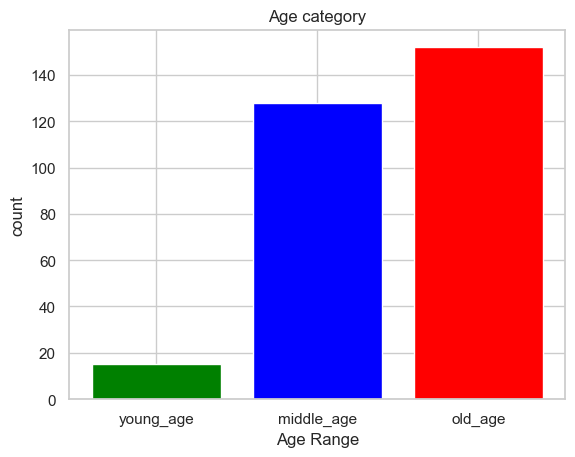

In [103]:
# Bar plot using matplotlib and seaborn for different categories of population age

cat = ['young_age','middle_age','old_age']
_count = [len(young_age), len(middle_age), len(old_age)]
plt.bar(cat, _count, color=['green', 'blue','red'])
plt.title('Age category')
plt.xlabel('Age Range')
plt.ylabel('count')
plt.show()

In [105]:
# converting numerical data into categorical data 

def age_range(row):
    '''converting population age into range of age'''
    if row>=29 and row<40:
        return 'youngAge'
    elif row>=40 and row<55:
        return 'middleAge'
    else:
        return 'oldAge'

In [107]:
# applying converted data into our dataset

df['ageRange'] = df['age'].apply(age_range)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal  num heart_disease   ageRange  
0   0     6    0       absence     oldAge  
1   3     3    1       presnce     oldAge  
2   2     7    1       presnce     oldAge  
3   0     3    0       absence   youngAge  
4   0     3    0       absence  middleAge

In [109]:
# converting numerical data into categorical data 

def _sex(row):
    if row==1:
        return 'male'
    else:
        return 'female'

In [111]:
# applying converted data into our dataset

df['gender'] = df['sex'].apply(_sex)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal  num heart_disease   ageRange  gender  
0   0     6    0       absence     oldAge    male  
1   3     3    1       presnce     oldAge    male  
2   2     7    1       presnce     oldAge    male  
3   0     3    0       absence   youngAge    male  
4   0     3    0       absence  middleAge  female

In [117]:
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [119]:
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [121]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [123]:
%matplotlib inline

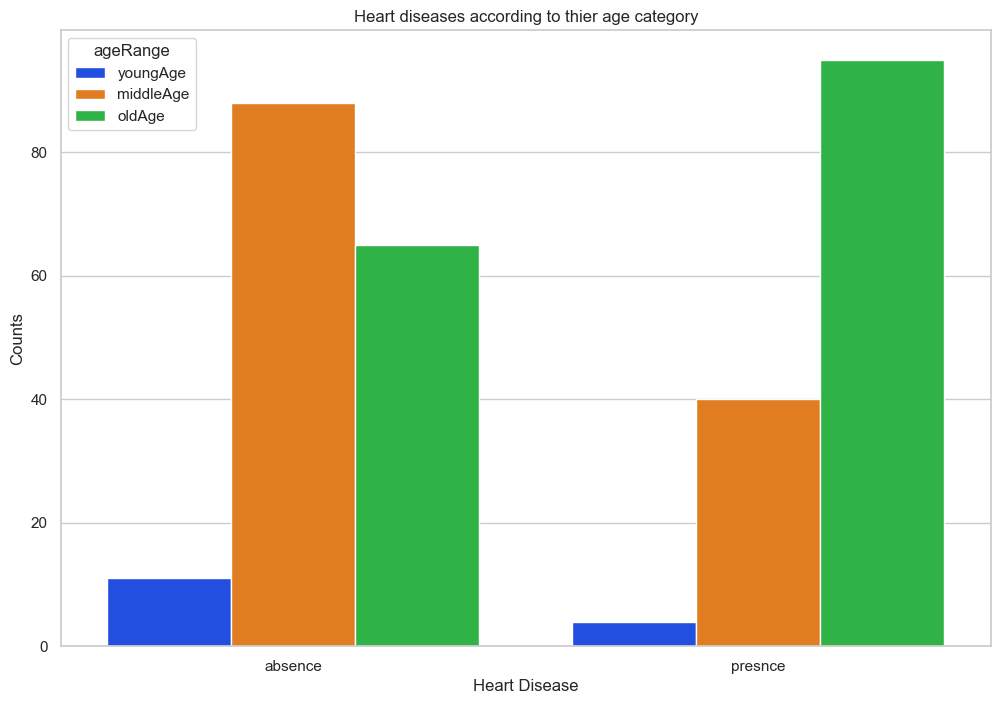

In [131]:
# count plot for heart diseases according to thier age category

plt.figure(figsize=(12,8))
hue_orders = ['youngAge', 'middleAge', 'oldAge']
plt.title("Heart diseases according to thier age category")
sns.countplot(x='heart_disease', hue='ageRange', data=df, hue_order=hue_orders, palette='bright')
plt.xlabel("Heart Disease")
plt.ylabel('Counts')
plt.show()

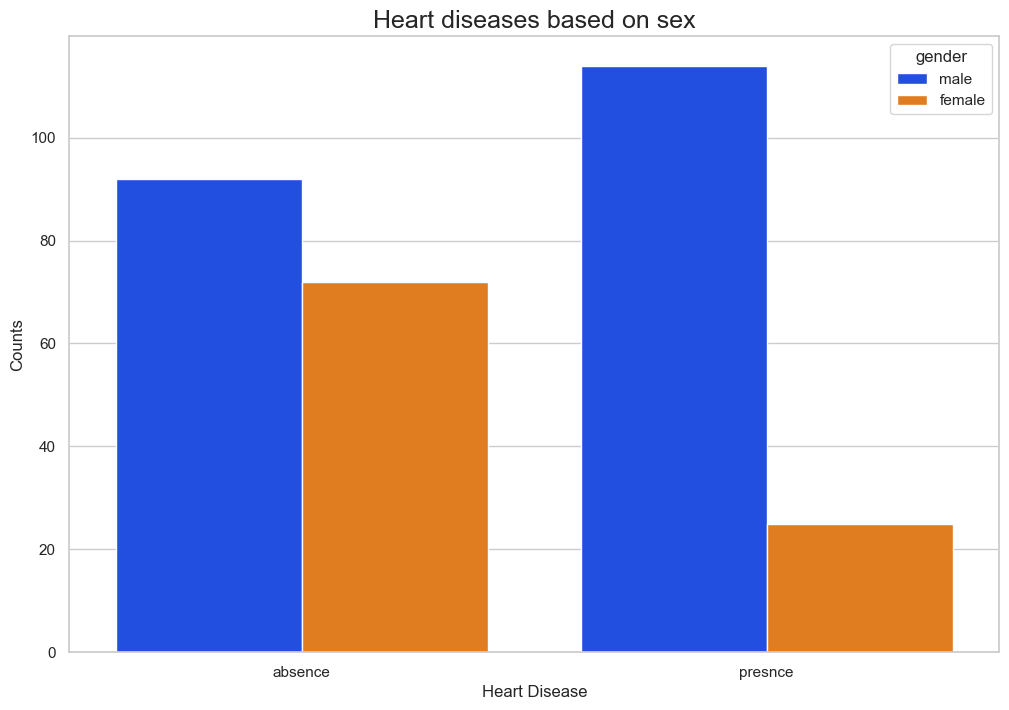

In [133]:
# count plot for heart diseases based on sex

plt.figure(figsize=(12,8))
plt.title("Heart diseases based on sex", fontsize=18)
sns.countplot(x=df['heart_disease'], hue='gender', data=df, palette="bright")
plt.xlabel("Heart Disease")
plt.ylabel('Counts')
plt.show()

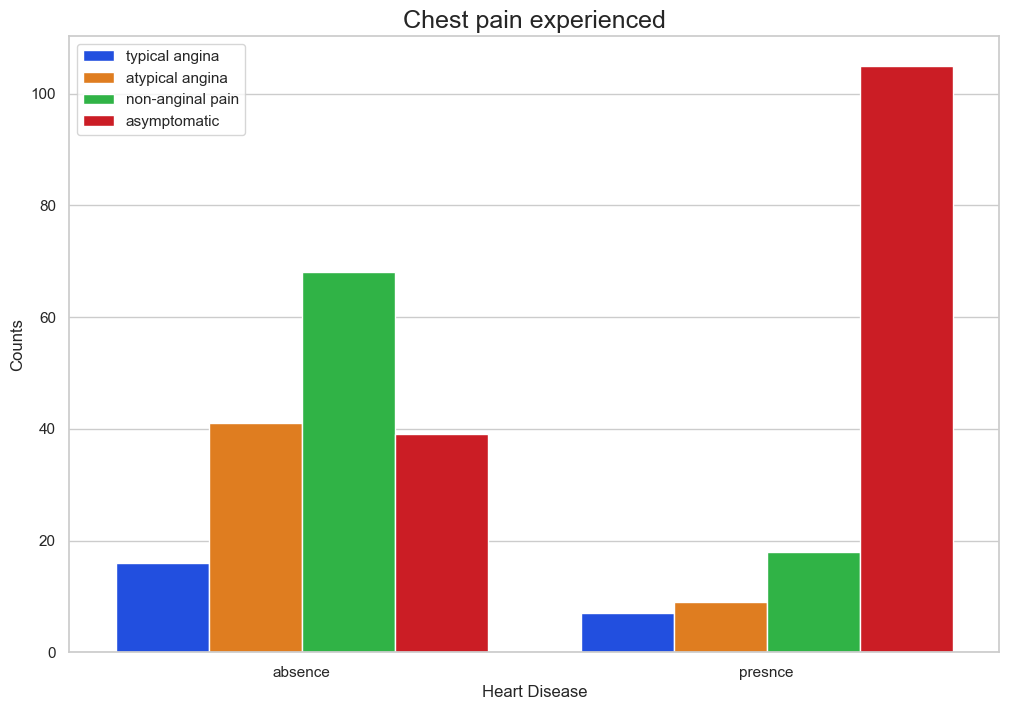

In [135]:
# count plot based on chest pain experienced

plt.figure(figsize=(12,8))
# hue_orders = ['youngAge', 'middleAge', 'oldAge']
plt.title("Chest pain experienced", fontsize=18)
sns.countplot(x=df['heart_disease'], hue='cp', data=df, palette="bright")
plt.legend(labels=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xlabel("Heart Disease")
plt.ylabel('Counts')
plt.show()

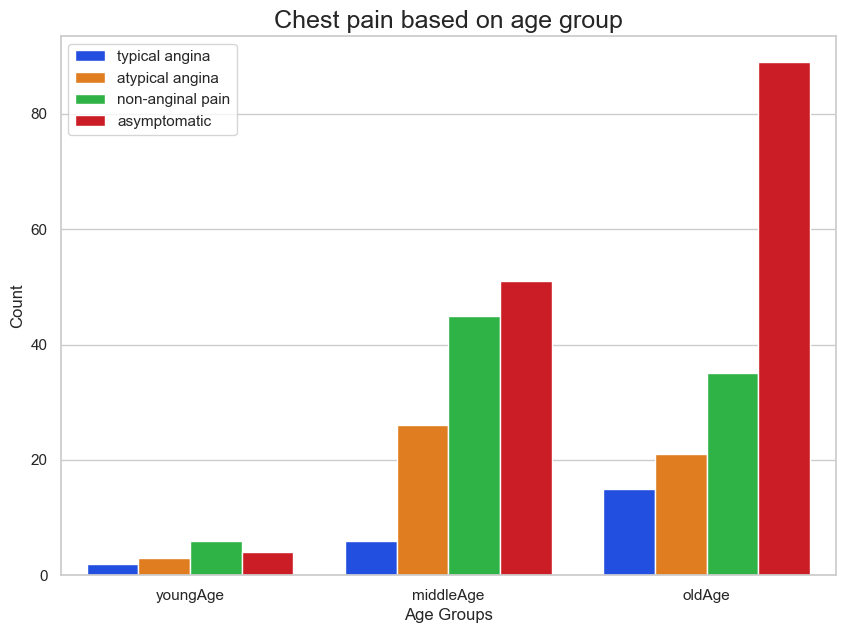

In [141]:
# Count plot for chest pain vs age group using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title("Chest pain based on age group", fontsize=18)
sns.countplot(x=df['ageRange'], hue='cp', data=df, palette='bright', order=['youngAge', 'middleAge', 'oldAge'])
plt.legend(labels=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

C:\Users\DHARSHITHAA KS\AppData\Local\Temp\ipykernel_2076\4165300575.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='trestbps', data=df, palette='bright')


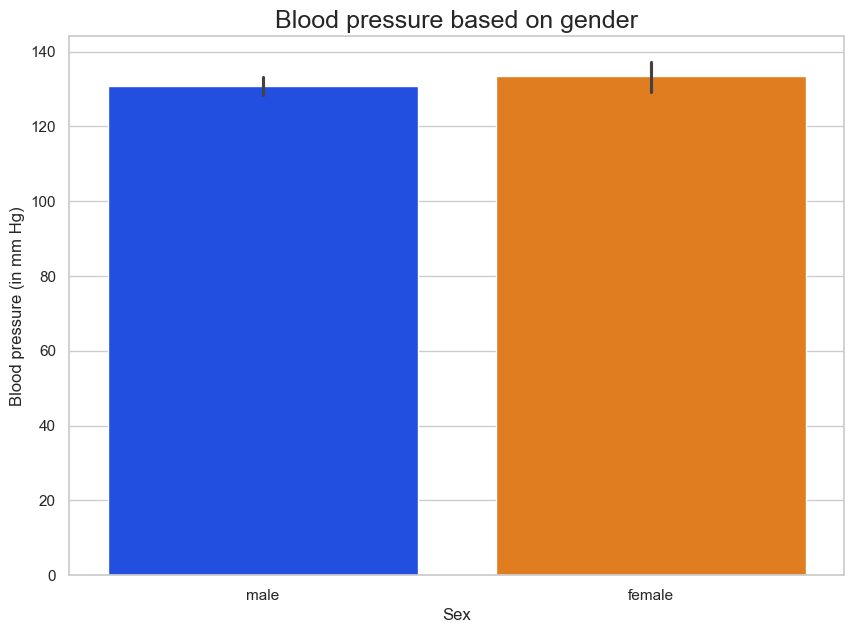

In [143]:
# Bar graph for Restin blood pressure(trestbs)(in mm Hg) based on gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Blood pressure based on gender', fontsize=18)
sns.barplot(x='gender', y='trestbps', data=df, palette='bright')
plt.xlabel('Sex')
plt.ylabel('Blood pressure (in mm Hg)')
plt.show()

C:\Users\DHARSHITHAA KS\AppData\Local\Temp\ipykernel_2076\3988450603.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='chol', data=df, palette='bright')


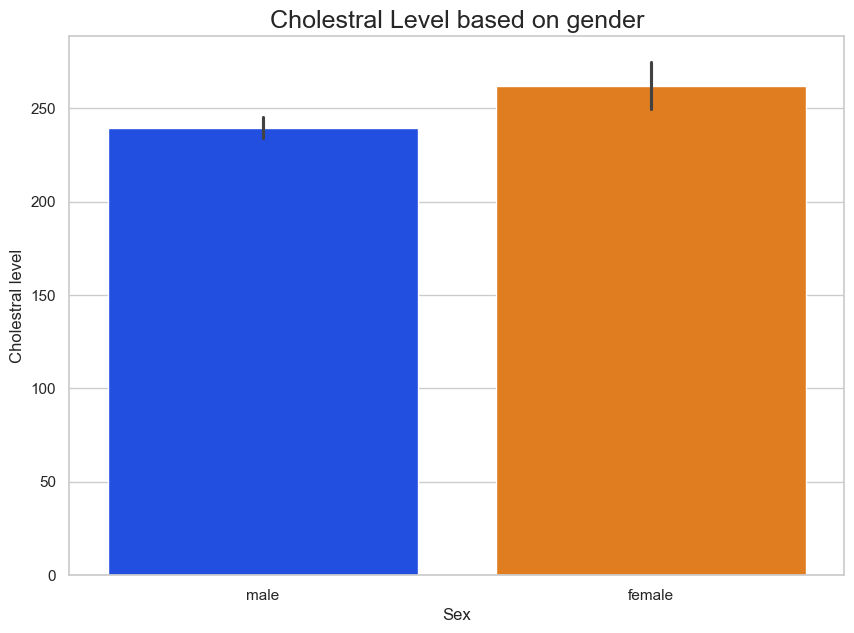

In [145]:
# Bar graph for Cholestral level based on gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Cholestral Level based on gender', fontsize=18)
sns.barplot(x='gender', y='chol', data=df, palette='bright')
plt.xlabel('Sex')
plt.ylabel('Cholestral level')
plt.show()

C:\Users\DHARSHITHAA KS\AppData\Local\Temp\ipykernel_2076\2475367162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='heart_disease', y='chol', data=df, palette='bright')


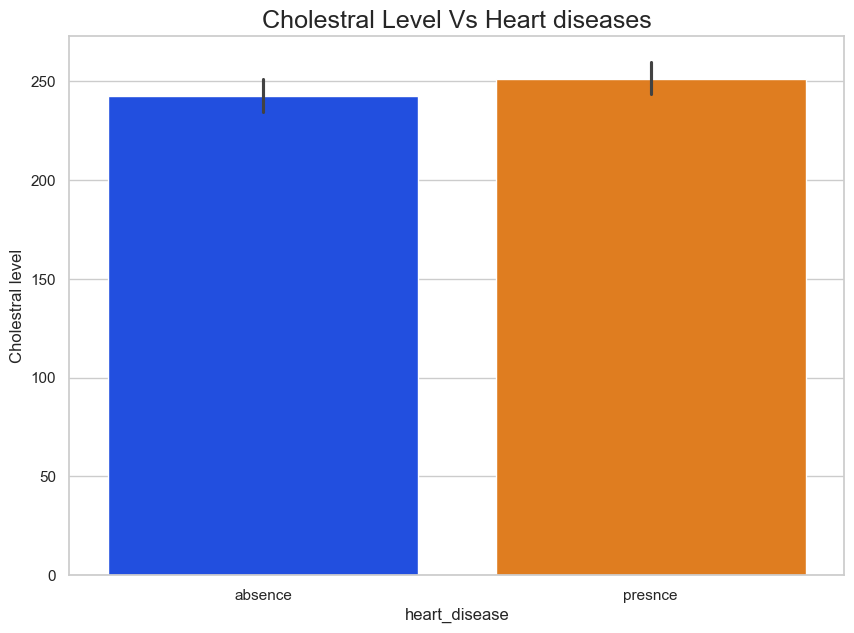

In [147]:
# Bar graph for Cholestral level vs Heart diseases using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Cholestral Level Vs Heart diseases', fontsize=18)
sns.barplot(x='heart_disease', y='chol', data=df, palette='bright')
plt.xlabel('heart_disease')
plt.ylabel('Cholestral level')
plt.show()

C:\Users\DHARSHITHAA KS\AppData\Local\Temp\ipykernel_2076\3026908464.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='heart_disease', y='trestbps', data=df, palette='bright')


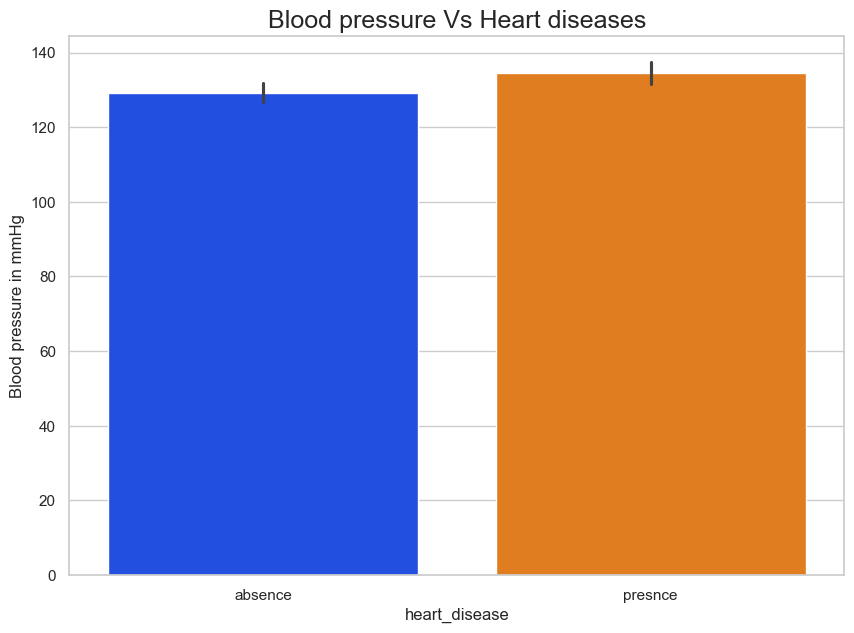

In [149]:
# Bar graph for Blood pressure vs Heart diseases using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Blood pressure Vs Heart diseases', fontsize=18)
sns.barplot(x='heart_disease', y='trestbps', data=df, palette='bright')
plt.xlabel('heart_disease')
plt.ylabel('Blood pressure in mmHg')
plt.show()


C:\Users\DHARSHITHAA KS\AppData\Local\Temp\ipykernel_2076\1199767370.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='age', y='trestbps',data=df, palette='bright')


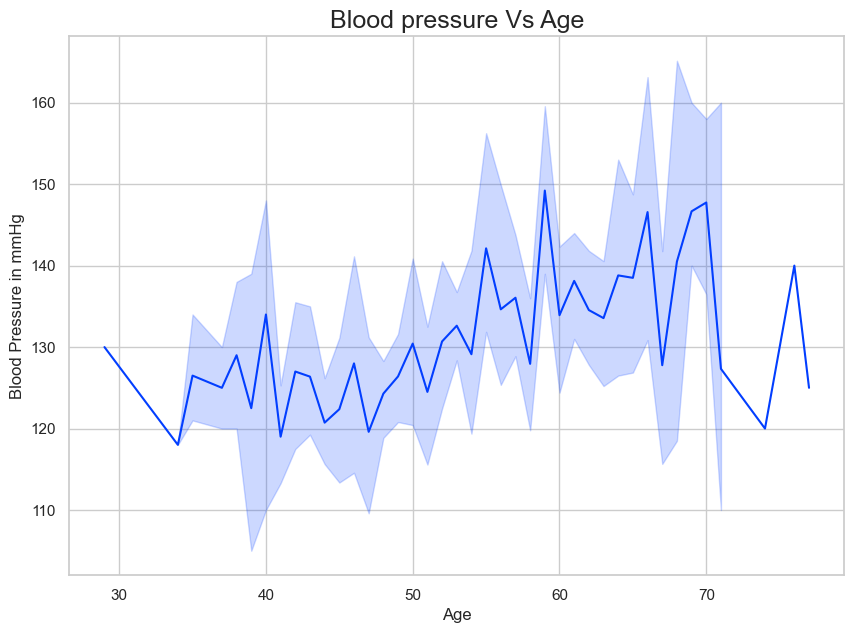

In [151]:
# Line plot for blood pressue vs age using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Blood pressure Vs Age', fontsize=18)
sns.lineplot(x='age', y='trestbps',data=df, palette='bright')
plt.xlabel('Age')
plt.ylabel('Blood Pressure in mmHg')
plt.show()

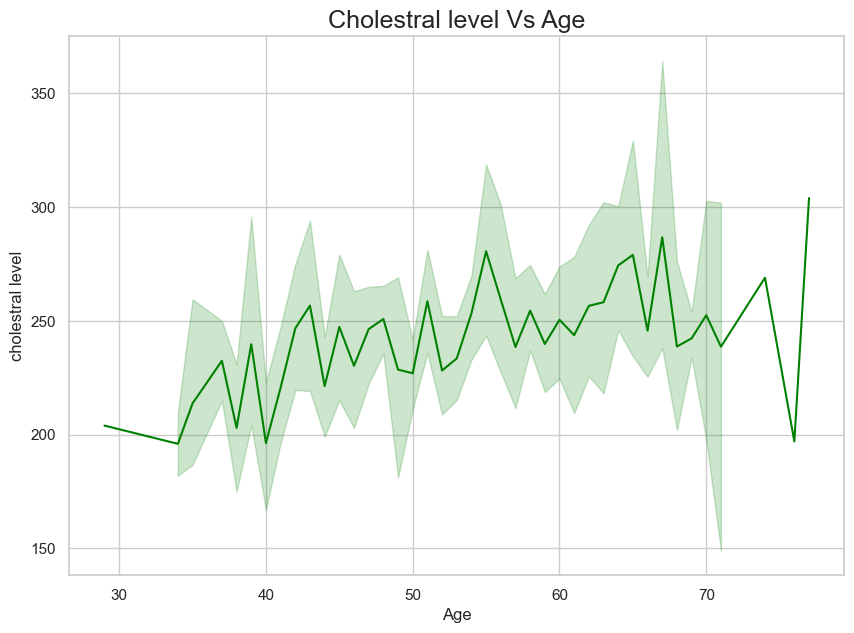

In [153]:
# Line plot for cholestral level vs age using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Cholestral level Vs Age', fontsize=18)
sns.lineplot(x='age', y='chol',data=df, color='green')
plt.xlabel('Age')
plt.ylabel('cholestral level')
plt.show()

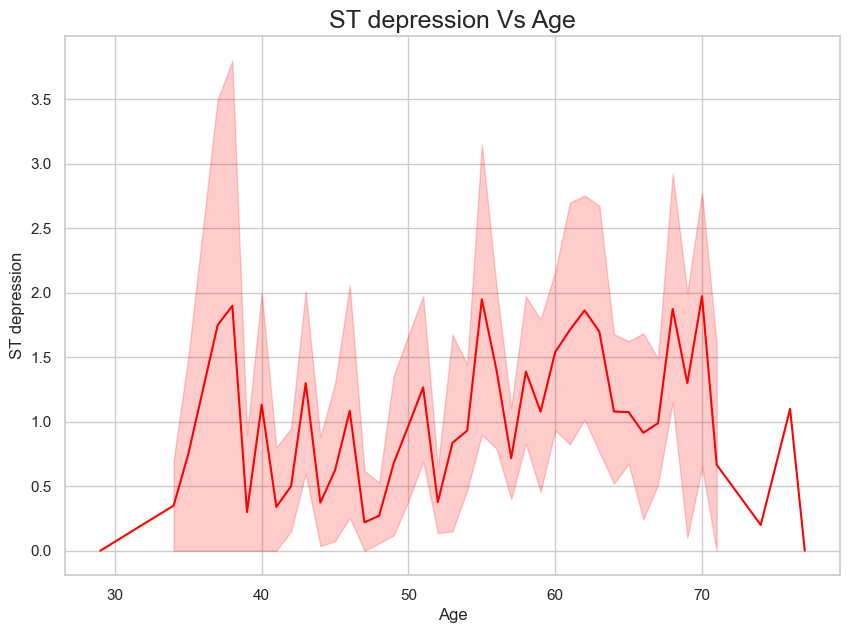

In [155]:
# Line plot for ST depression vs age using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('ST depression Vs Age', fontsize=18)
sns.lineplot(x='age', y='oldpeak',data=df, color='red')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.show()

C:\Users\DHARSHITHAA KS\AppData\Local\Temp\ipykernel_2076\699793643.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='heart_disease', y='oldpeak', data=df, palette='bright')


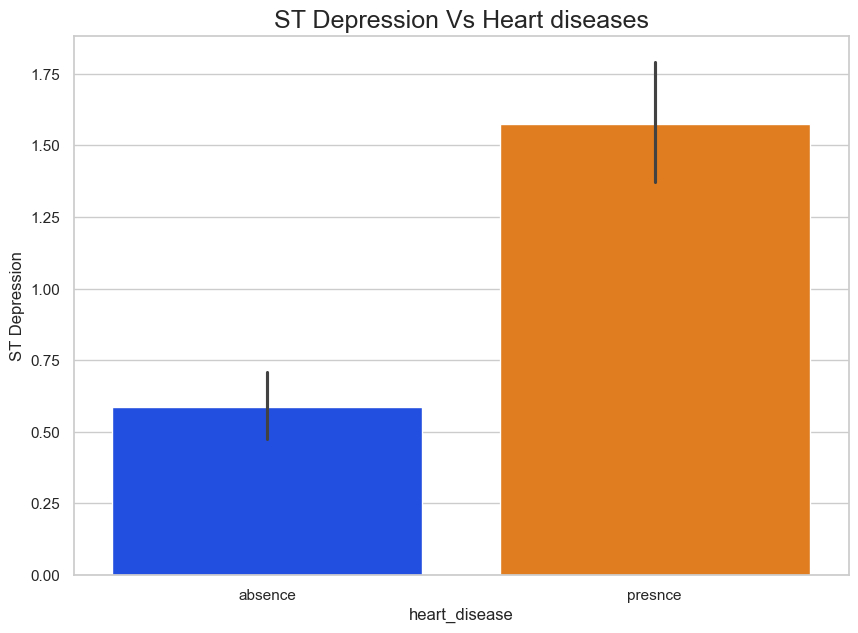

In [157]:
# Bar graph for ST Depression vs Heart diseases using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('ST Depression Vs Heart diseases', fontsize=18)
sns.barplot(x='heart_disease', y='oldpeak', data=df, palette='bright')
plt.xlabel('heart_disease')
plt.ylabel('ST Depression')
plt.show()

C:\Users\DHARSHITHAA KS\AppData\Local\Temp\ipykernel_2076\4240508655.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='oldpeak', data=df, palette='bright')


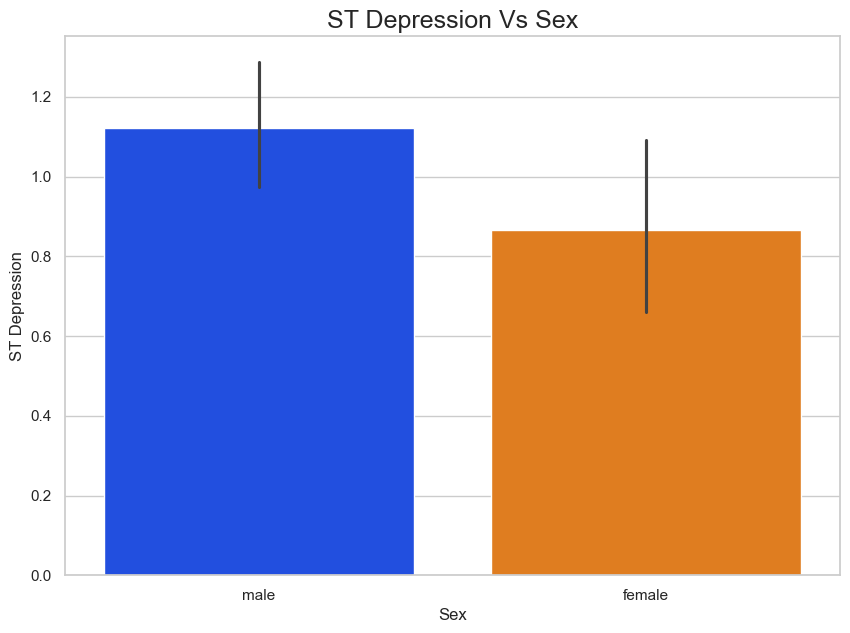

In [159]:
# Bar graph for ST Depression vs Gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('ST Depression Vs Sex', fontsize=18)
sns.barplot(x='gender', y='oldpeak', data=df, palette='bright')
plt.xlabel('Sex')
plt.ylabel('ST Depression')
plt.show()

C:\Users\DHARSHITHAA KS\AppData\Local\Temp\ipykernel_2076\1712931498.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='heart_disease', y='exang', data=df, palette='bright')


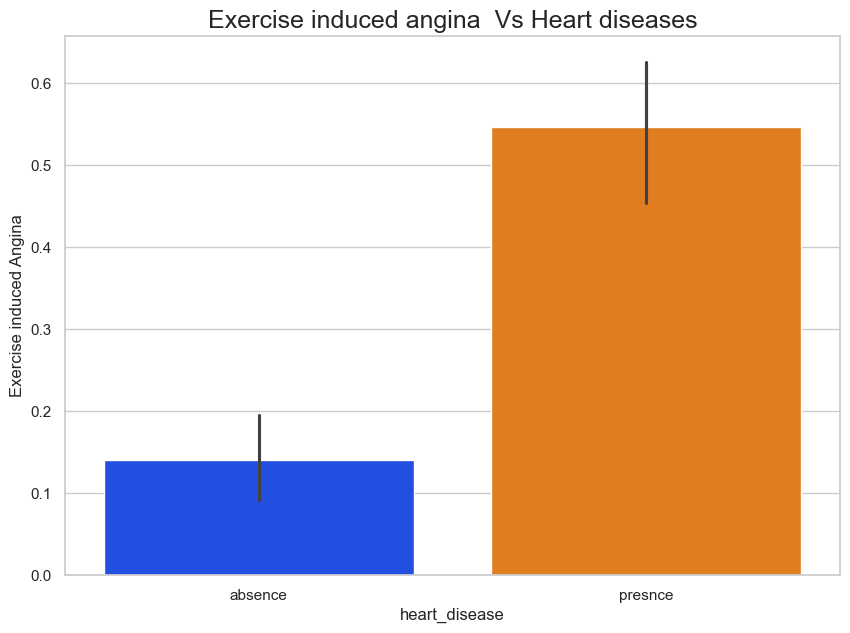

In [161]:
# Bar graph for exercise induced Angina vs Heart diseases using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Exercise induced angina  Vs Heart diseases', fontsize=18)
sns.barplot(x='heart_disease', y='exang', data=df, palette='bright')
plt.xlabel('heart_disease')
plt.ylabel('Exercise induced Angina')
plt.show()

C:\Users\DHARSHITHAA KS\AppData\Local\Temp\ipykernel_2076\1189624077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='exang', data=df, palette='bright')


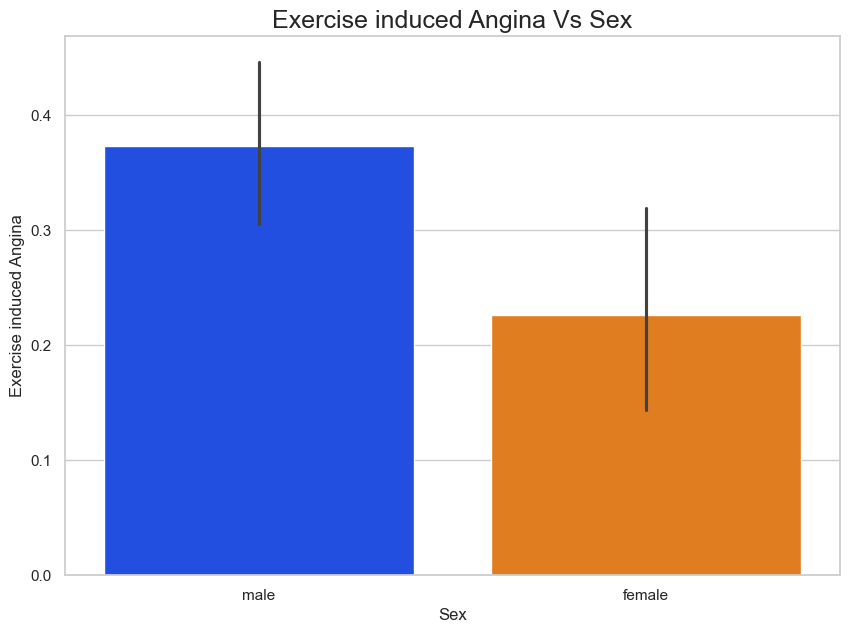

In [163]:
# Bar graph for Exercise induced Angina vs Gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Exercise induced Angina Vs Sex', fontsize=18)
sns.barplot(x='gender', y='exang', data=df, palette='bright')
plt.xlabel('Sex')
plt.ylabel('Exercise induced Angina')
plt.show()

C:\Users\DHARSHITHAA KS\AppData\Local\Temp\ipykernel_2076\727091762.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='fbs', data=df, palette='bright')


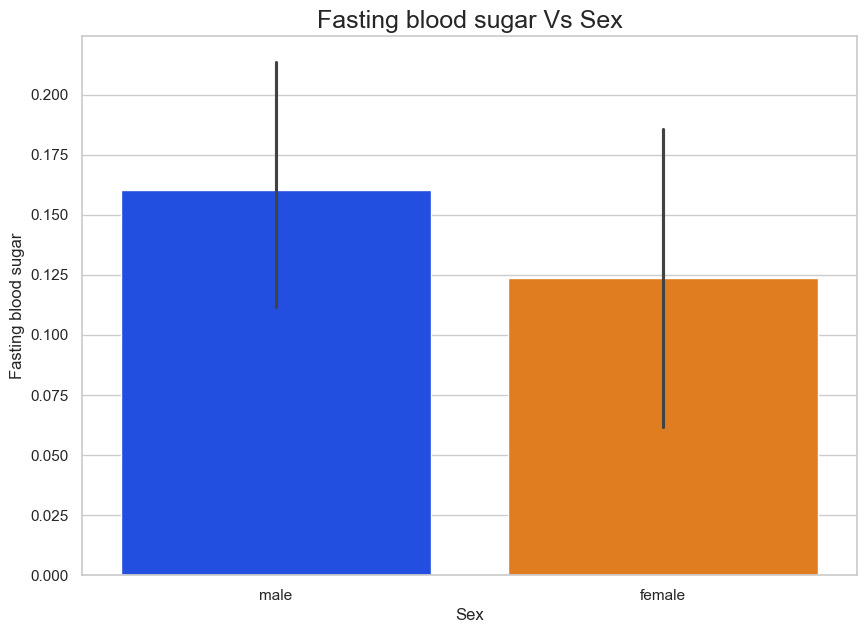

In [165]:
# Bar graph for Fasting blood sugar vs Gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Fasting blood sugar Vs Sex', fontsize=18)
sns.barplot(x='gender', y='fbs', data=df, palette='bright')
plt.xlabel('Sex')
plt.ylabel('Fasting blood sugar')
plt.show()

In [173]:
# exporting final dataset to as csv file for Dashboarding in Power BI

df.to_csv("downloads/heart_disease_dataset.csv", index=False)